In [64]:
import pandas as pd  # For dataframes
import matplotlib.pyplot as plt  # For graphs
import os

In [65]:
# Constants used throughout the notebook

PATH = os.path.abspath("spendings.xls")

MONTHS = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
]

CATEGORY_HEADERS = [
    "Rent",
    "Bills/Taxes",
    "Transportation",
    "Grocery",
    "Shopping",
    "Subscription",
    "Food",
    "Drinks",
    "Leisure",
    "Vacation",
    "Other"
]

GRAPH_COLORS = [
    '#919191',
    '#90BE6D',
    '#52796f',
    '#F9C74F',
    '#4D908E',
    '#F9844A',
    '#277DA1',
    '#7678ed'
]

SPENDINGS_CATEGORIES = [
    "bills/taxes",
    "transportation",
    "grocery",
    "other",
    "food",
    "shopping",
    "leisure",
    "drinks",
    "subscription",
    "rent",
    "vacation",
]

CATEGORY_MENU_SELECTION = """
    Which category's progression spending do you want to print?
    - Bills/Taxes
    - Transportation
    - Grocery
    - Other
    - Food
    - Shopping
    - Leisure
    - Drinks
    - Subscription
    - Rent
    - Vacation
"""

MAIN_MENU_SELECTION = """
    \n
    \t\tMAIN MENU
    1) View a month's spendings analytics.
    2) Print a month's spendings datasheet.
    3) View the progression spending of past months.
    4) View a category's monthly progression spending.
    5) Exit program.
"""

In [ ]:
def read_file_sheet():
    """Function to read the sheets from the main file"""

    xls_file = pd.ExcelFile(PATH)
    sheets = xls_file.sheet_names
    count_sheets = range(0, len(sheets))

    return sheets, count_sheets

In [ ]:
def line_chart_plot(category=None):

    if category is None:
        title = "Monthly Spendings"
        y_label = "Total Spent"
    else:
        title = f"{category}'s Monthly Spendings"
        y_label = f"{category}'s Total Spend"

    sheets, count_sheets = read_file_sheet()

    months_total = []
    
    for i in count_sheets:
        # Read each sheet into a dataframe one at a time.
        month = pd.read_excel(PATH, sheet_name=sheets[i])
        if category is None:
            months_total.append(round(month['Amount'].sum(), 2))
        else:
            months_total.append(month[month["Category"] == category]["Amount"].sum())

    plt.plot(range(len(sheets)), months_total)
    plt.title(title, fontsize=18)
    plt.xlabel("Months", fontsize=14)
    plt.xticks(range(len(sheets)), sheets, rotation=45)
    plt.ylabel(y_label, fontsize=14)
    
    # To display the total amount spent on each point.
    for x, s in enumerate(months_total):
        plt.text(x, s+30, "£%d" %s, ha="center")
    
    plt.show()

In [66]:
def check_error(sheet):
    """Check if the chosen sheet can be opened or not."""

    try:
        month_sheet = pd.read_excel(PATH, sheet_name=sheet)
    except ValueError:
        print(f"Unable to find the sheet with the name '{sheet}'\n")
        return (False,)
    else:
        date_sheet = month_year(sheet)
        return (True, month_sheet, date_sheet)


In [67]:
def month_year(sheet):
    """Function returning the requested month and related year."""

    x = sheet.split('_')

    for month in MONTHS:
        if x[0] in month.lower():
            return (month, x[1])


In [69]:
def view_month_datasheet(sheet):
    """Print the complete spendings datasheet of the chosen month."""

    res = check_error(sheet)
    if res[0]:
        date = res[2]
        print("\n")
        print(f"\t\t\n{date[0]} {date[1]} Complete Spendings Datasheet")
        print("-------------------------------------------------------")
        print(res[1])
        print("-------------------------------------------------------\n") 

    else:
        return


In [ ]:
def total_spent(spendings, month):
    """This function will print the total spent in the current month."""

    total = spendings['Amount'].sum()
    print(f"Total spent in {month}: £{round(total, 2)}\n")

In [ ]:
def print_analytics(spendings, month_year):
    """Function calling other functions to display the analytics."""
    
    print("\n")
    print("********************************************\n")
    print(f"\tAnalytics for {month_year[0]} {month_year[1]}\n")
    print("********************************************\n")
    total_spent(spendings, month_year[0])  # To print total money spent.
    bar_chart_plot(spendings, month_year)

In [70]:
def spendings(sheet):
    """Retrieve the datasheet of the chosen month and display its analytics."""
    
    res = check_error(sheet)
    if res[0]:
        date = res[2]
        print_analytics(res[1], date)
    else:
        return


In [72]:
def top_spendings(category):
    """Print categories table standings from highest to lowest spending."""
    
    sorted_vals = sorted(category.values(), reverse=True) # Sort the values.
    sorted_dict = {}
    
    for i in sorted_vals:
        for k in category.keys():
            if category[k] == i:
                sorted_dict[k] = category[k]
                break
    
    place = 1
    print("Spendings from highest to lowest")
    print("-----------------------------------")

    for key, val in sorted_dict.items():
        if key.lower() == "transportation":
            key = "Trans."
        elif key.lower() == 'bills/taxes':
            key = 'b./tax'
        elif key.lower() == 'subscription':
            key = 'Subscr.'
        
        if place >= 10:
            print(f"{place}.| {key}\t\t| £{val}")
        else:
            print(f"{place}. | {key}\t\t| £{val}")

        print("-----------------------------------")
        place += 1


In [73]:
def categories_total(spendings):
    """Returns a dictionary with the total money spent for each category."""
    
    category_spendings = {}
    
    for category in CATEGORY_HEADERS:
        category_spendings[category] = round(spendings[spendings["Category"] == category]["Amount"].sum(), 2)
        
    keys = category_spendings.keys()
    values = category_spendings.values()
    
    # Function to print categories table standings based on spendings.
    top_spendings(category_spendings)
    
    return (keys, values)


In [74]:
def bar_chart_plot(spendings, date):
    """Bar chart of money spent per category."""
    
    key_val = categories_total(spendings)
    
    plt.bar(key_val[0], key_val[1], color=GRAPH_COLORS)
    plt.title(f"{date[0]} {date[1]} Spendings", fontsize=18)
    plt.xlabel("Categories", fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel("Total spent (£)", fontsize=14)

    for index, value in enumerate(key_val[1]):
        plt.text(index, value, f"£{str(value)}", ha='center', va='center', fontsize=12)
    
    plt.show()  # To show the graph plotted here and not at the end of the program.


In [77]:
def check_category_exists():
    
    while True:
        print(CATEGORY_MENU_SELECTION)

        category = input()
        
        if category.lower() in SPENDINGS_CATEGORIES:
            return category
        else:
            print("\nPLEASE CHOOSE FROM ONE OF THE AVAILABLE CATEGORIES\n")
    


    

    		MAIN MENU
    1) View a month's spendings analytics.
    2) Print a month's spendings datasheet.
    3) View the progression spending of past months.
    4) View a category's monthly progression spending.
    5) Exit program.

Which month's analytics do you want to view?


********************************************

	Analytics for January 2024

********************************************

Total spent in January: £2214.06

Spendings from highest to lowest
-----------------------------------
1. | Rent		| £950.0
-----------------------------------
2. | Shopping		| £419.88
-----------------------------------
3. | Food		| £181.64
-----------------------------------
4. | Other		| £128.81
-----------------------------------
5. | Leisure		| £108.64
-----------------------------------
6. | Trans.		| £94.25
-----------------------------------
7. | b./tax		| £72.67
-----------------------------------
8. | Drinks		| £70.9
-----------------------------------
9. | Vacation		| £69.45


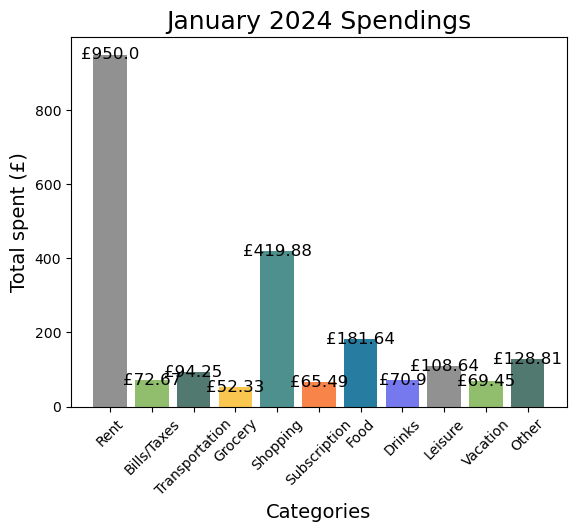


    

    		MAIN MENU
    1) View a month's spendings analytics.
    2) Print a month's spendings datasheet.
    3) View the progression spending of past months.
    4) View a category's monthly progression spending.
    5) Exit program.


Goodbye and see you next time Luca :)


In [78]:
while True:
    
    print(MAIN_MENU_SELECTION)
    
    choice = input("\nChoose an option 1 to 5: ")
    
    if choice == '1':
        print("Which month's analytics do you want to view?")
        month_chosen = input("(i.e. 'jan_2024'): ")
        spendings(month_chosen)

    elif choice == '2':
        print("Which month's spendings datasheet do you want to get?")
        month_chosen = input("(i.e. 'jan_2024'): ")
        view_month_datasheet(month_chosen)
        
    elif choice == '3':
        print()
        line_chart_plot()
        
    elif choice == '4':
        category = check_category_exists()
        line_chart_plot(
            category=category
        )

    elif choice == '5':
        print("\nGoodbye and see you next time Luca :)")
        break
    
    else:
        print("Please select a valid entry between 1 and 5.")
